<a href="https://colab.research.google.com/github/ndb796/Natural-Language-Processing-Tutorial-for-KISA/blob/master/%EA%B8%B0%EA%B3%84%20%ED%95%99%EC%8A%B5%EA%B3%BC%20%EB%8B%A8%EC%96%B4%20%EC%9E%84%EB%B2%A0%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><b>한국어 Word2Vec 실습</b></h2>

<h5><b>KoNLPy 라이브러리 설치</b></h5>

In [1]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (135 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

<h5><b>데이터셋 불러오기</b></h5>

In [0]:
# 필요한 라이브러리를 불러옵니다.
import urllib.request
import pandas as pd

In [3]:
# 네이버 리뷰 문장 데이터셋을 불러옵니다.
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fb31efbe240>)

In [0]:
# 학습용 데이터를 초기화합니다.
train_data = pd.read_table('ratings.txt')

In [5]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


<h6><b>데이터 전처리</b></h6>

* 기본적인 정제 작업을 진행합니다.

In [6]:
# 널(Null) 값이 존재하는 행을 제거합니다.
train_data = train_data.dropna(how='any') 
# 리뷰 데이터의 개수를 출력합니다.
print(len(train_data))

199992


In [7]:
# 정규 표현식(Regular Expression)을 이용해 한글 데이터만 남기기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<h6><b>한글 형태소 분석 및 토큰화 수행</b></h6>

In [0]:
# 한글 형태소 분석기를 이용해 토큰화 작업을 수행합니다. (10분 가량 소요)
from konlpy.tag import Okt

tokenized_dataset = [] # 토큰화 완료된 학습 데이터
stopwords = ['은', '는', '이', '가', '을', '를'] # 불용어 정의
okt = Okt() # 한글 형태소 분석기 라이브러리 객체 선언

for w in train_data['document']:
    tokenized = okt.morphs(w, stem=True)
    tokenized = [word for word in tokenized if not word in stopwords]
    tokenized_dataset.append(tokenized)

In [9]:
# 토큰화 완료된 데이터의 개수 확인
print(len(tokenized))

7


In [11]:
# 토큰화가 완료된 리뷰 데이터 확인
print(tokenized_dataset[0])
print(tokenized_dataset[1])
print(tokenized_dataset[2])

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']
['디자인', '배우다', '학생', '으로', '외국', '디자이너', '와', '그', '들', '일군', '전통', '통해', '발전', '하다', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '에', '끝', '까지', '열정', '지키다', '노라노', '같다', '전통', '있다', '저', '와', '같다', '사람', '들', '꿈', '꾸다', '이루다', '나가다', '수', '있다', '것', '에', '감사하다']
['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '도', '없다', '최고']


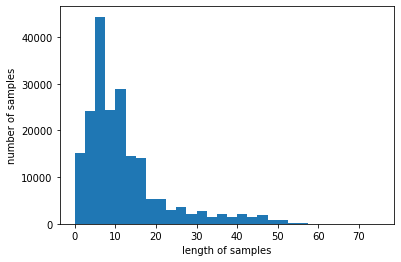

In [12]:
import matplotlib.pyplot as plt

# 리뷰에 포함된 토큰의 개수 분포
plt.hist([len(s) for s in tokenized_dataset], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

<h6><b>Word2Vec 학습 진행 및 결과 확인</b></h6>

* <b>gensim</b>: Numpy, SciPy 등으로 구현된 오픈소스 자연어 처리 라이브러리로, Word2Vec 클래스를 지원합니다.
  * size: 임베딩 벡터의 차원
  * window: 윈도우 크기
  * min_count: 단어 최소 빈도 수
  * workers: 학습을 위해 사용하는 프로세스 수
  * sg: 0 = CBOW, 1 = Skip-gram

In [0]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_dataset, size=100, window=5, workers=4, sg=1)

In [14]:
# 학습된 모델을 확인합니다.
print(model)

Word2Vec(vocab=16489, size=100, alpha=0.025)


In [15]:
print(model.wv.most_similar("공부"))

[('섭외', 0.6872212886810303), ('연습', 0.6843417882919312), ('분발', 0.6775972843170166), ('말좀', 0.6692848205566406), ('후배', 0.6655274033546448), ('신중하다', 0.6578215956687927), ('반성', 0.6526665687561035), ('차려', 0.6526376605033875), ('자제', 0.650853157043457), ('수정', 0.6499249339103699)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [16]:
print(model.wv.most_similar("재미"))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('긴장도', 0.7306990623474121), ('잼', 0.6786482930183411), ('뭣', 0.6700581312179565), ('쥐뿔', 0.6499877572059631), ('아무런', 0.6468765735626221), ('없슴', 0.6444764137268066), ('흥미', 0.637540340423584), ('짜임새', 0.6350452899932861), ('재미없다', 0.6334530711174011), ('애매', 0.6319055557250977)]


In [17]:
print(model.wv.most_similar("프로그램"))

[('프로', 0.7837256789207458), ('예능', 0.6836252808570862), ('방송', 0.668006181716919), ('연속극', 0.645944356918335), ('오디션', 0.6317610740661621), ('예체능', 0.6239084005355835), ('공중파', 0.6235235929489136), ('강호동', 0.6230658292770386), ('고정', 0.6155886054039001), ('교체', 0.6146793961524963)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
